<a href="https://colab.research.google.com/github/rogin320/Rogin/blob/main/01_data_science_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print("my first note book")

my first note book


In [6]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("SP.csv")
print(df.head())


Saving SP.csv to SP.csv
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [7]:
df.shape

(1000, 8)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


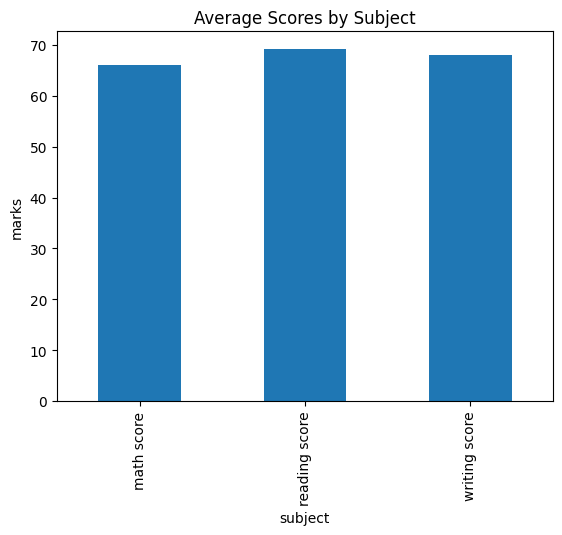

In [16]:
import matplotlib.pyplot as plt
avg=df[['math score','reading score','writing score']].mean()
avg.plot(kind='bar')
plt.title("Average Scores by Subject")
plt.xlabel("subject")
plt.ylabel('marks')
plt.show()

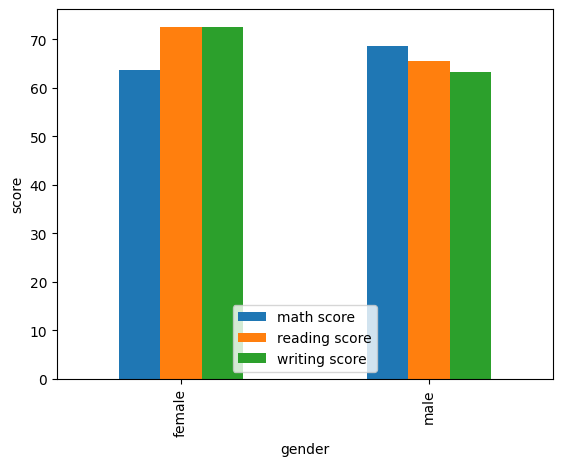

In [17]:
#gender wise performance
genderv=df.groupby('gender')[['math score','reading score','writing score']].mean()
genderv.plot(kind='bar')
plt.ylabel('score')
plt.show()

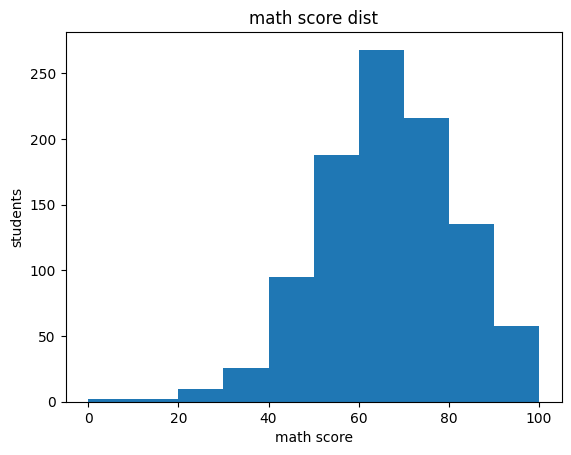

In [19]:
plt.hist(df['math score'])
plt.title('math score dist')
plt.xlabel('math score')
plt.ylabel('students')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
df_m=pd.get_dummies(df,drop_first=True)
x=df_m.drop('math score',axis=1)
y=df_m['math score']
#I coverted catagorical variables using one-hot encoading

In [35]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [36]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
# Predict
y_pred = model.predict(X_test)

# Eva
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4.214763142474851
MSE: 29.095169866715487
R2 Score: 0.8804332983749565


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model=RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [42]:
#predict
y_pred_rf = rf_model.predict(X_test)

In [43]:
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 4.7406428571428565
Random Forest MSE: 36.69565650921202
Random Forest R2: 0.8491990721184489


In [44]:
#comparing
print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: 0.8804332983749565
Random Forest R2: 0.8491990721184489
